# (연구) HST example 3

- toc:true
- branch: master
- badges: true
- comments: true
- author: 신록예찬
- hide: false
- categories: [논문연구]

### 실험환경 

In [1]:
!conda env list

# conda environments:
#
base                     /home/cgb2/anaconda3
py39r40               *  /home/cgb2/anaconda3/envs/py39r40



### import

In [302]:
def show(fig): 
    return HTML(fig.to_html(include_plotlyjs='cdn',include_mathjax=False, config=dict({'scrollZoom':False})))

In [2]:
## 1. remove trash
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('image', cmap='Greys')
import rpy2 
%load_ext rpy2.ipython
%run pybase
%run heavysnow 
plt.style.use('ggplot')

### load data

In [3]:
n=23
f=np.array(pd.read_csv("2021-08-15-MCU-ticket.csv").Worldwide)/1000000
V=np.array(pd.read_csv("2021-08-15-MCU-ticket.csv").Film)
W=np.array(pd.read_csv("2021-08-15-MCU-weights.csv",index_col=0))-np.eye(n,n)

### HST

In [4]:
gs=GraphSignal(V,W,f)
hst=HeavysnowTransform(gs)
hst.snow(tau=80000,b=1)

HST (tau= 80000, b=1)
80000/80000
HST completed and all history is recorded.


/home/cgb2/Dropbox/01_yechan/_notebooks/heavysnow.py:11: RuntimeWarning:

invalid value encountered in true_divide



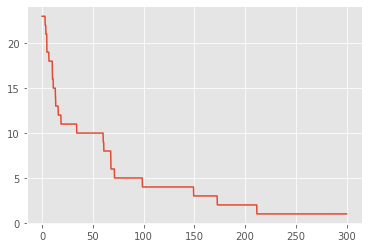

In [166]:
def choose_theta(maxtheta=300):
    y=[]
    x=np.arange(start=0.01,stop=maxtheta,step=0.1)
    for i in range(len(x)):
        hst.adjustingtheta(x[i]) 
        gs=GraphSignal(V,hst.snowweight,f)
        spa=SpectralAnalysis(gs)
        spa.graphFouriertransform()
        spa.decompose()        
        y.append(sum(abs(spa.lamb)<0.001))
    plt.plot(x,y)    
choose_theta()   

In [167]:
hst.adjustingtheta(300)

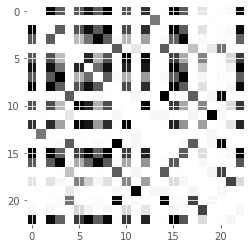

In [169]:
plt.imshow(hst.snowweight)

In [190]:
_type=['solo']*5+['multi']+['solo']*4+['multi']+['solo']+['multi']+['solo']*5+['multi']+['solo']*2+['multi']+['solo']
df=pd.DataFrame({'V':hst.V,'f':hst.f,'divlink':hst.graphweight.sum(axis=1), 'conlink':hst.graphweight.sum(axis=0),'type':_type})
df

,V,f,divlink,conlink,type
0,Iron Man,585.174222,4.000000,2.515815,solo
1,The Incredible Hulk,263.427551,1.000000,0.294608,solo
2,Iron Man 2,623.933331,4.153846,3.107363,solo
3,Thor,449.326618,2.562500,2.241890,solo
4,Captain America: The First Avenger,370.569774,1.750000,0.948269,solo
5,The Avengers,1518.812988,4.647059,4.332114,multi
6,Iron Man 3,1214.811252,3.200000,1.690351,solo
7,Thor: The Dark World,644.571402,2.411765,2.147921,solo
8,Captain America: The Winter Soldier,714.264267,3.266667,2.455757,solo
9,Guardians of the Galaxy,773.328629,1.631579,1.212075,solo


In [322]:
import plotly.graph_objects as go
from IPython.display import HTML
import scipy.ndimage

_contours = {
        "x": {"show": True, "start": -1, "end": 1, "size": 0.2},
        "y": {"show": True, "start": -1, "end": 1, "size": 0.2}
}


_mode ='wrap'

_filter = np.array([1.0,1.0])*1
#_z0=scipy.ndimage.filters.gaussian_filter(np.diag(np.r_[hs2.snowygrounds[:,0],hs2.snowygrounds[:1,0]])+100, _filter-0.2, mode=_mode) 
_z1=scipy.ndimage.filters.gaussian_filter(np.diag(hst.snowygrounds[:,4000])+0,_filter, mode=_mode) 
_z2=scipy.ndimage.filters.gaussian_filter(np.diag(hst.snowygrounds[:,6000])+5000,_filter+0.3, mode=_mode)
_z3=scipy.ndimage.filters.gaussian_filter(np.diag(hst.snowygrounds[:,8000])+50000,_filter+0.8, mode=_mode)

_colorscale=[
        [0, 'rgb(0, 0, 0)'],
        [1./10000, 'rgb(50, 50, 50)'],
        [1./1000, 'rgb(100, 100, 100)'],
        [1./100, 'rgb(150, 150, 150)'],
        [1./10, 'rgb(200, 200, 200)'],
        [1., 'rgb(255, 255, 255)'],
        ]
_colorbar= dict(
        tick0= 0,
        tickmode= 'array',
        tickvals= [-5, 0, 5, 10]
    )


fig = go.Figure(data=[go.Surface(x = _vx, y = _vy, z = _z1, colorscale=_colorscale, colorbar=_colorbar,showscale=False),
                      go.Surface(x = _vx, y = _vy, z = _z2, colorscale=_colorscale, colorbar=_colorbar,showscale=False),
                      go.Surface(x = _vx, y = _vy, z = _z3, colorscale=_colorscale, colorbar=_colorbar,showscale=False),
                     ])
fig.update_layout(width=1000,height=1000, scene_camera_eye=dict(x=2, y=1, z=0.5))

NameError: name '_vx' is not defined

In [368]:
import plotly.graph_objects as go

_colorscale=[
        [0, 'rgb(0, 0, 0)'],
        [1./10000, 'rgb(50, 50, 50)'],
        [1./1000, 'rgb(100, 100, 100)'],
        [1./100, 'rgb(150, 150, 150)'],
        [1./10, 'rgb(200, 200, 200)'],
        [1., 'rgb(255, 255, 255)'],
        ]
_colorbar= dict(
        tick0= 0,
        tickmode= 'array',
        tickvals= [-5, 0, 5, 10])

_mode ='wrap'
_filter = np.array([1,1])*0.5

_z1 = np.diag(hst.snowygrounds[:,0])+0
_z2 = np.diag(hst.snowygrounds[:,20000])+5000
_z3 = np.diag(hst.snowygrounds[:,40000])+10000
_z4 = np.diag(hst.snowygrounds[:,60000])+15000
_z5 = np.diag(hst.snowygrounds[:,80000])+20000

# _z1=scipy.ndimage.filters.gaussian_filter(_z1, _filter, mode=_mode) 
# _z2=scipy.ndimage.filters.gaussian_filter(_z2, _filter, mode=_mode)
# _z3=scipy.ndimage.filters.gaussian_filter(_z3, _filter, mode=_mode)
# _z4=scipy.ndimage.filters.gaussian_filter(_z4, _filter, mode=_mode)


fig = go.Figure([go.Surface(x = df.conlink, y = df.divlink, z = _z1, colorscale=_colorscale, colorbar=_colorbar, showscale=False),
                 go.Surface(x = df.conlink, y = df.divlink, z = _z2, colorscale=_colorscale, colorbar=_colorbar, showscale=False),
                 go.Surface(x = df.conlink, y = df.divlink, z = _z3, colorscale=_colorscale, colorbar=_colorbar, showscale=False),
                 go.Surface(x = df.conlink, y = df.divlink, z = _z4, colorscale=_colorscale, colorbar=_colorbar, showscale=False),
                 go.Surface(x = df.conlink, y = df.divlink, z = _z5, colorscale=_colorscale, colorbar=_colorbar, showscale=False)])
fig.update_layout(width=1000,height=1000, scene_camera_eye=dict(x=-2, y=-2, z=0.05))
show(fig)
fig.write_image('2022-01-13-snow.pdf')  

### R 환경으로.. 

In [8]:
import rpy2 
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [16]:
n=hst.n 
V=hst.V
f=hst.f 
WEuclid= hst.euclidweight
Wgraph= (hst.graphweight+hst.graphweight.T)/2
Whst= hst.snowweight
W= hst.graphweight

In [90]:
%R -i n
%R -i V
%R -i f
%R -i WEuclid
%R -i Wgraph
%R -i Whst
%R -i W

### 유클리드와 그래프도메인의 정보를 플랏. 

In [162]:
%%R
library(plotly)
fig <- plot_ly(z = ~volcano)
fig <- fig %>% add_surface()

fig

R[write to console]: Error in viewer(index_html) : 
  'browser' must be a non-empty character string



RRuntimeError: Error in viewer(index_html) : 
  'browser' must be a non-empty character string


In [132]:
%%R 
source('heavysnow.R')
df<-tibble(V)
df$f<-as.vector(f)
df$divlink<-0
df$conlink<-0
df$link<-0
for(i in 1:23){
    df$divlink[i]<-sum(W[i,])
    df$conlink[i]<-sum(W[,i])
    df$link[i]<-(sum(W[i,])+sum(W[,i]))/2
}
df$type<-rep('solo',23)
df[V %in% c("The Avengers" ,"Avengers: Age of Ultron","Captain America: Civil War","Avengers: Infinity War","Avengers: Endgame"),'type']='multi'
df

# A tibble: 23 × 6
   V                                       f divlink conlink  link type 
   <chr>                               <dbl>   <dbl>   <dbl> <dbl> <chr>
 1 Iron Man                             585.    4      2.52  3.26  solo 
 2 The Incredible Hulk                  263.    1      0.295 0.647 solo 
 3 Iron Man 2                           624.    4.15   3.11  3.63  solo 
 4 Thor                                 449.    2.56   2.24  2.40  solo 
 5 Captain America: The First Avenger   371.    1.75   0.948 1.35  solo 
 6 The Avengers                        1519.    4.65   4.33  4.49  multi
 7 Iron Man 3                          1215.    3.2    1.69  2.45  solo 
 8 Thor: The Dark World                 645.    2.41   2.15  2.28  solo 
 9 Captain America: The Winter Soldier  714.    3.27   2.46  2.86  solo 
10 Guardians of the Galaxy              773.    1.63   1.21  1.42  solo 
# … with 13 more rows


`-` geom_coutour_filled() 복습 

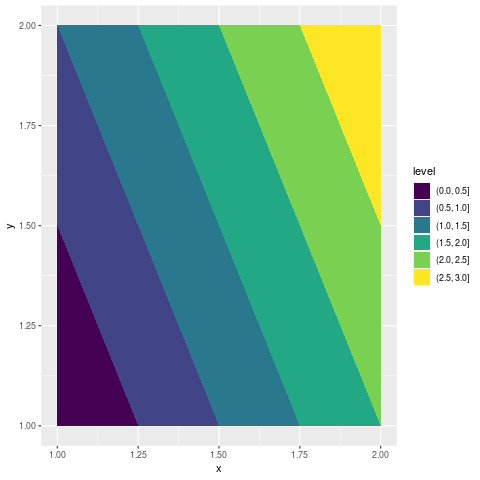

In [133]:
%%R 
df_ = tibble(x=c(1,1,2,2),y=c(1,2,1,2),z=c(0,1,2,3)) ## 데이터는 항상 격자모양이어야함 
v <- ggplot(df_, aes(x, y, z = z))
v + geom_contour_filled() 

`-` df의 데이터프레임 변형하여 플랏이 가능하도록 만들자. 

In [134]:
%%R 
df$divlink = round(df$divlink,1)
df$conlink = round(df$conlink,1)
div_ranges_= range(df$divlink)
con_ranges_= range(df$conlink)
df_=expand.grid(seq(div_ranges_[1]-0.1,div_ranges_[2]+0.1,by=0.1),seq(con_ranges_[1]-0.1,con_ranges_[2]+0.1,by=0.1))
names(df_)=c('divlink','conlink')
df_$f=0 
df_$V=NA
df_$link=NA
df_$type=NA
df_=tibble(V=df_$V,f=df_$f,divlink=df_$divlink,conlink=df_$conlink,link=df_$link,type=df_$type)
for(i in 1:23){
    df_[abs(df_$divlink - df[i,]$divlink)<0.1 & abs(df_$conlink - df[i,]$conlink)<0.1,] <- df[i,]
}
df_

# A tibble: 3,600 × 6
   V         f divlink conlink  link type 
   <chr> <dbl>   <dbl>   <dbl> <dbl> <chr>
 1 <NA>      0     0.8     0.1    NA <NA> 
 2 <NA>      0     0.9     0.1    NA <NA> 
 3 <NA>      0     1       0.1    NA <NA> 
 4 <NA>      0     1.1     0.1    NA <NA> 
 5 <NA>      0     1.2     0.1    NA <NA> 
 6 <NA>      0     1.3     0.1    NA <NA> 
 7 <NA>      0     1.4     0.1    NA <NA> 
 8 <NA>      0     1.5     0.1    NA <NA> 
 9 <NA>      0     1.6     0.1    NA <NA> 
10 <NA>      0     1.7     0.1    NA <NA> 
# … with 3,590 more rows


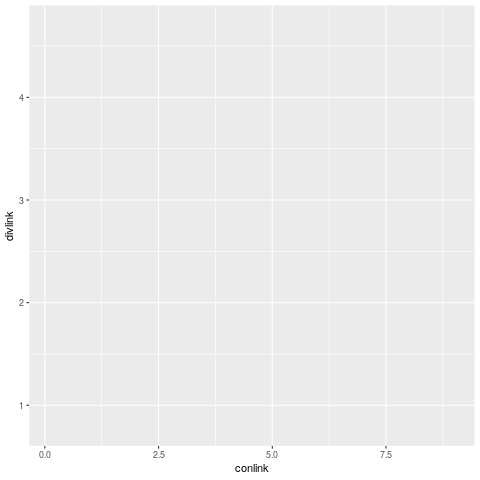

In [158]:
%%R 
p1<-ggplot(df_, aes(x=conlink, y=divlink,z=f))
    #geom_point(aes(x=conlink,y=divlink,size=f**2,shape=type),col='hotpink1',stroke=3)+
    #scale_size(range=c(2,30))+
    #scale_alpha_manual(values=c(1,0.6))+
    #scale_shape_manual(values=c(11,1))+
    #theme_light()+
    #geom_text_repel(aes(x=conlink,y=divlink,label=V),col="gray40")+
    
    #geom_density2d(aes(x=conlink,y=divlink,fill=tatf,color=f)),+
    #ylab("Out-degree")+xlab("In-degree")+
    #ggtitle("")+theme(plot.title=element_text(face="bold.italic",size=rel(2)))+
    #theme(axis.title.x=element_text(face=4,size=rel(1)))+theme(axis.title.y=element_text(face=4,size=rel(1)))
    #theme(legend.position = "none")+
show(p1)
ggsave(plot=p1,"./2021-12-10-p1.pdf",width=15,height=10)

In [15]:
%%R 
df

# A tibble: 23 × 6
   V                                       f divlink conlink  link type 
   <chr>                               <dbl>   <dbl>   <dbl> <dbl> <chr>
 1 Iron Man                             585.    4       2.52 3.26  solo 
 2 The Incredible Hulk                  263.    1       0.29 0.647 solo 
 3 Iron Man 2                           624.    4.15    3.11 3.63  solo 
 4 Thor                                 449.    2.56    2.24 2.40  solo 
 5 Captain America: The First Avenger   371.    1.75    0.95 1.35  solo 
 6 The Avengers                        1519.    4.65    4.33 4.49  multi
 7 Iron Man 3                          1215.    3.2     1.69 2.45  solo 
 8 Thor: The Dark World                 645.    2.41    2.15 2.28  solo 
 9 Captain America: The Winter Soldier  714.    3.27    2.46 2.86  solo 
10 Guardians of the Galaxy              773.    1.63    1.21 1.42  solo 
# … with 13 more rows


### gfft 수행하고 결과를 저장함. 

In [ ]:
%%R 
g1<-gfft(f,WEuclid)
g2<-gfft(f,Wgraph)
g3<-gfft(f,Whst)

### 아이겐플랏 


In [ ]:
%%R 
library(gridExtra)
e1<-eigenplot(g1)+theme(plot.title=element_text(face="bold.italic",size=rel(1)))
e2<-eigenplot(g2)+theme(plot.title=element_text(face="bold.italic",size=rel(1)))
e3<-eigenplot(g3)+theme(plot.title=element_text(face="bold.italic",size=rel(1)))
s1<-specplot(g1)
s2<-specplot(g2)
s3<-specplot(g3)
p2<-grid.arrange(e1,e2,e3,s1,s2,s3,nrow=2)
ggsave(plot=p2,"./2021-12-10-p2.pdf",width=5,height=3)

### 분해 

In [ ]:
%%R
d1<-decompose(f,WEuclid,V=V) # 0, 35000, 60000, 80000
d2<-decompose(f,Wgraph,V=V) # 0, 35000, 60000, 80000
d3<-decompose(f,Whst,V=V) # 0, 35000, 60000, 80000

d1$case<-"Euclid"
d2$case<-"Graph"
d3$case<-"HST"
.df2 <-rbind(d1,d2,d3)
.df2 %>% group_by(case,eigenvectorindex) #%>% mutate(textsize= 10*(abs(fhat)>70))
df2=merge(df, .df2 %>% group_by(case,eigenvectorindex) %>% mutate(textsize= 10*(abs(fhat)>70))) %>% as_tibble
df2

In [ ]:
%%R -r 150 -w 1000 -h 5000
        
p3<-ggplot(data=filter(df2,eigenvectorindex %in% 1:23, case=='HST'))+
    geom_col(aes(x=Vindex,y=fhat,fill=fhat>0),width=0.7)+
    geom_text_repel(aes(x=Vindex,y=fhat,label=V,size=textsize),col=1,fontface=4,alpha=0.8,segment.size=0.2,segment.color="gray60",min.segment.length=5,hjust=0.1)+
    scale_radius(range = c(0,1.8))+
    guides(size=FALSE)+
    facet_wrap("eigenvectorindex",ncol=1)+
    geom_hline(aes(yintercept=0),col="gray60",lty=2)+
    xlab("")+ylab("")+guides(fill=FALSE)+
    theme(axis.text.x=element_text(angle=85,hjust=1,vjust=1,face=4,size=rel(0.7),colour="gray60"))+
    theme_light()+
    theme(strip.text.x = element_text(size = 10, color = "black", face = "bold.italic"))+
    theme(strip.text.y = element_text(size = 10, color = "black", face = "bold.italic"))+
    theme(plot.title=element_text(face="bold.italic",size=rel(1.5)))
show(p3)
ggsave(plot=p3,"./2021-12-10-p3.pdf",width=10,height=15)